# Music2Latent tests

<a href="https://colab.research.google.com/github/inspektral/onset-benchmark/blob/main/music2latent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


In [1]:
# %pip install music2latent

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import synth
from IPython.display import Audio, display
import librosa

import utils
from music2latent import EncoderDecoder



/home/inspektral/miniconda3/envs/mir/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
encdec = EncoderDecoder()
SAMPLE_RATE = 44100


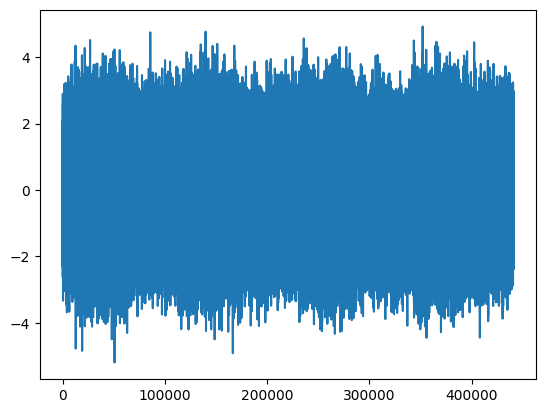

In [4]:
adsr = synth.adsr(0.1, 0.5, 0.0, 0.2, 20)
saw = synth.sawtooth_wave(np.tile(adsr, 4), [50], duration=10)

noise = synth.noise(duration=10)

audio = saw+noise
latent = encdec.encode(audio)

audio_recon = encdec.decode(latent)

display(Audio(audio, rate=44100))
display(Audio(audio_recon, rate=44100))

plt.plot(audio)


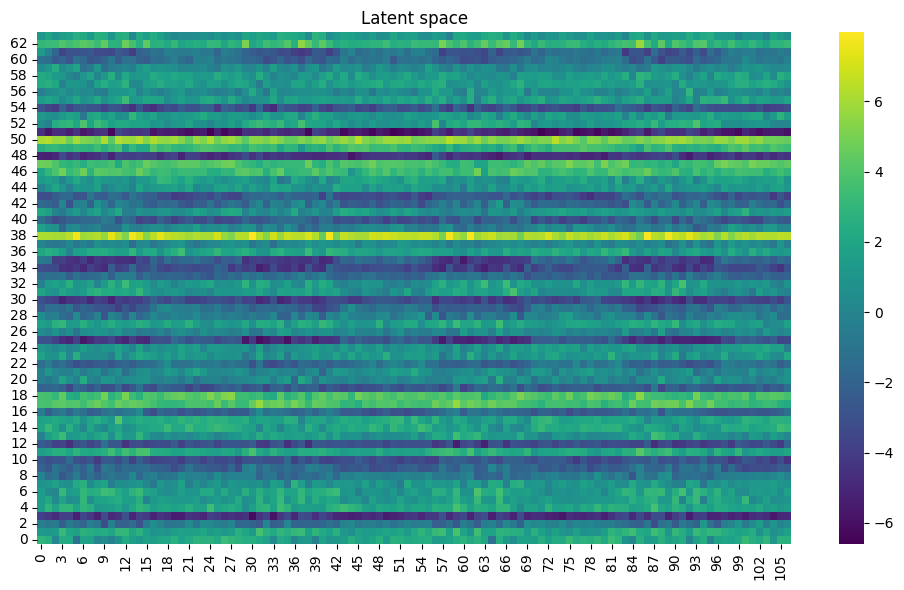

In [5]:
latent.shape
utils.plot_heatmap(latent.cpu().numpy()[0,:,:], title="Latent space")

In [6]:
features = encdec.encode(audio, extract_features=True)

In [7]:
print(features.shape)

torch.Size([1, 8192, 107])


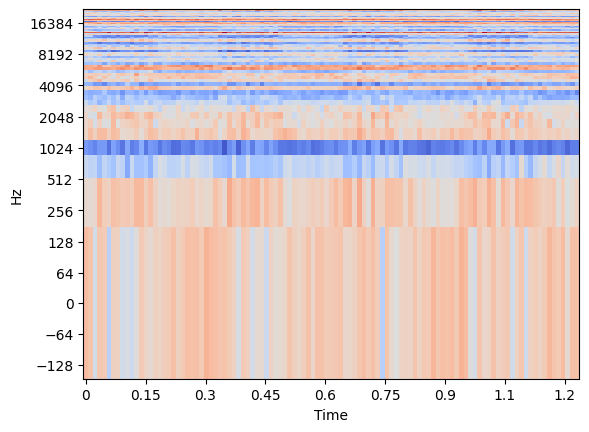

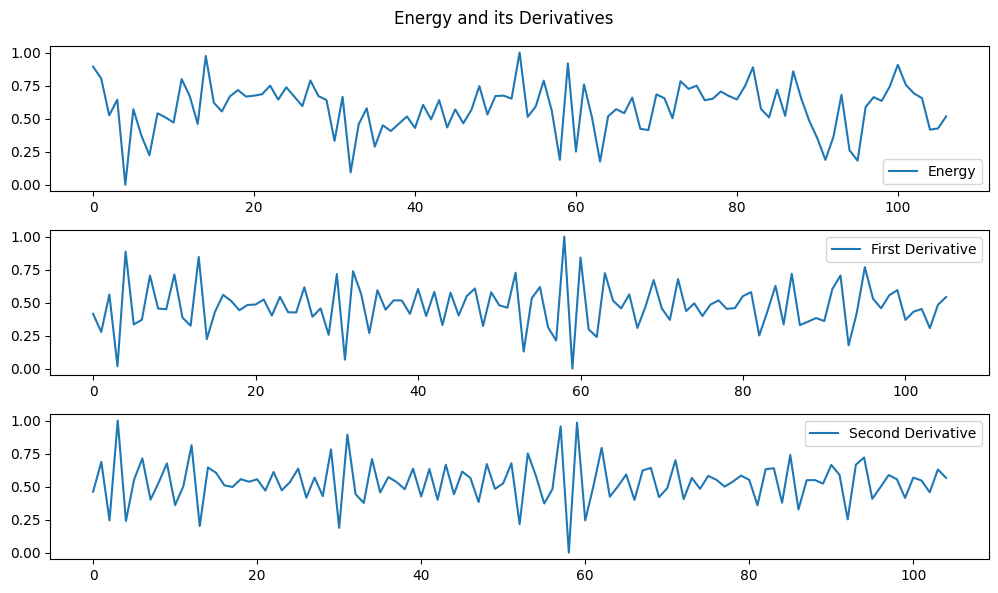

In [8]:
spectrum = latent.cpu().numpy()[0,:,:]

display(Audio(utils.add_padding(audio), rate=SAMPLE_RATE))

librosa.display.specshow(spectrum, sr=SAMPLE_RATE, x_axis='time', y_axis='log')
plt.show()

energy = np.sum(spectrum, axis=0)
d_energy = np.diff(energy)
dd_energy = np.diff(d_energy)

plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot((energy-np.min(energy))/ np.max(energy-np.min(energy)), label='Energy')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot((d_energy-np.min(d_energy))/ np.max(d_energy-np.min(d_energy)), label='First Derivative')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot((dd_energy-np.min(dd_energy))/ np.max(dd_energy-np.min(dd_energy)), label='Second Derivative')
plt.legend()

plt.suptitle("Energy and its Derivatives")
plt.tight_layout()
plt.show()

distances shape: (64, 106)
max_indices: [32 59 23 15 62  6 46 35 28 19  2 38 56 61 42  7 52  5  0 20]


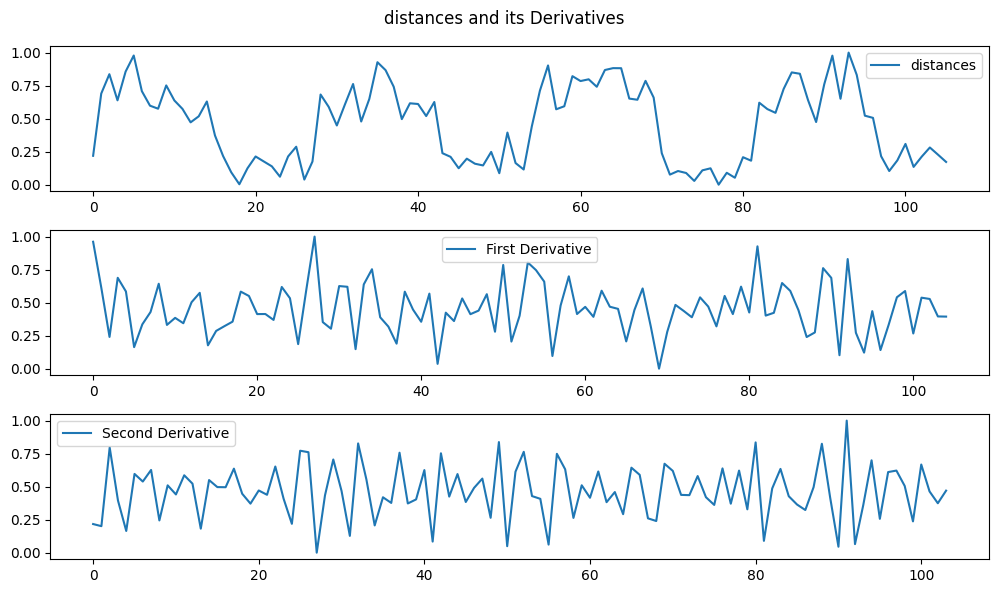

In [12]:
distances = utils.distances(spectrum, top_n=20)
d_distances = np.diff(distances)
dd_distances = np.diff(d_distances)

plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot(utils.norm(distances), label='distances')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(utils.norm(d_distances), label='First Derivative')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(utils.norm(dd_distances), label='Second Derivative')
plt.legend()

plt.suptitle("distances and its Derivatives")
plt.tight_layout()
plt.show()

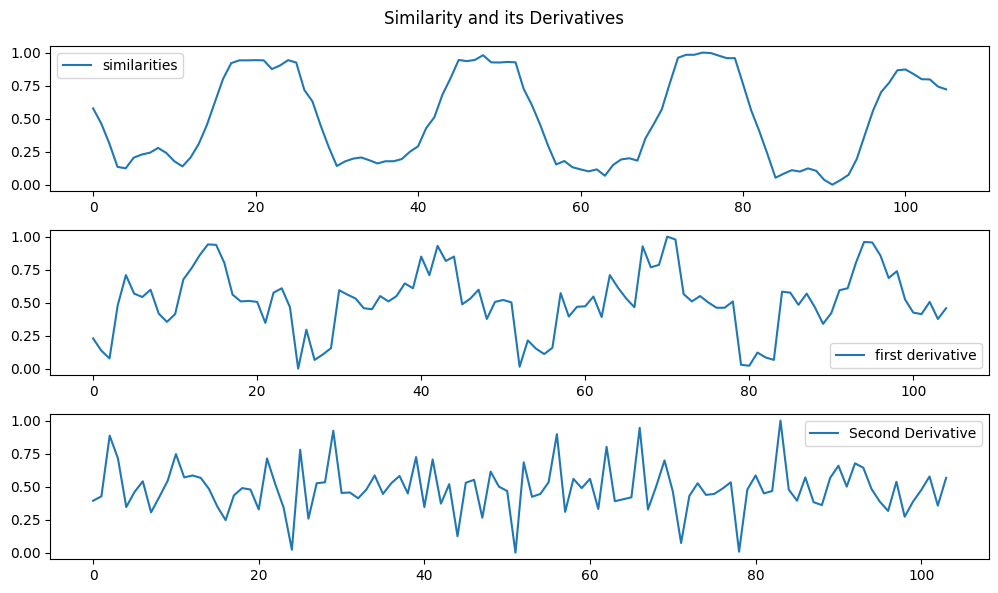

In [10]:
similarities = utils.smoothing(utils.cosine_similarity(spectrum))
d_similarities = np.diff(similarities)
dd_similarities = np.diff(d_similarities)

plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot(utils.norm(similarities), label='similarities')
plt.legend()
plt.subplot(3, 1, 2)
plt.plot(utils.norm(d_similarities), label="first derivative")
plt.legend()
plt.subplot(3, 1, 3)
plt.plot(utils.norm(dd_similarities), label='Second Derivative')
plt.legend()
plt.suptitle("Similarity and its Derivatives")
plt.tight_layout()
plt.show()